# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



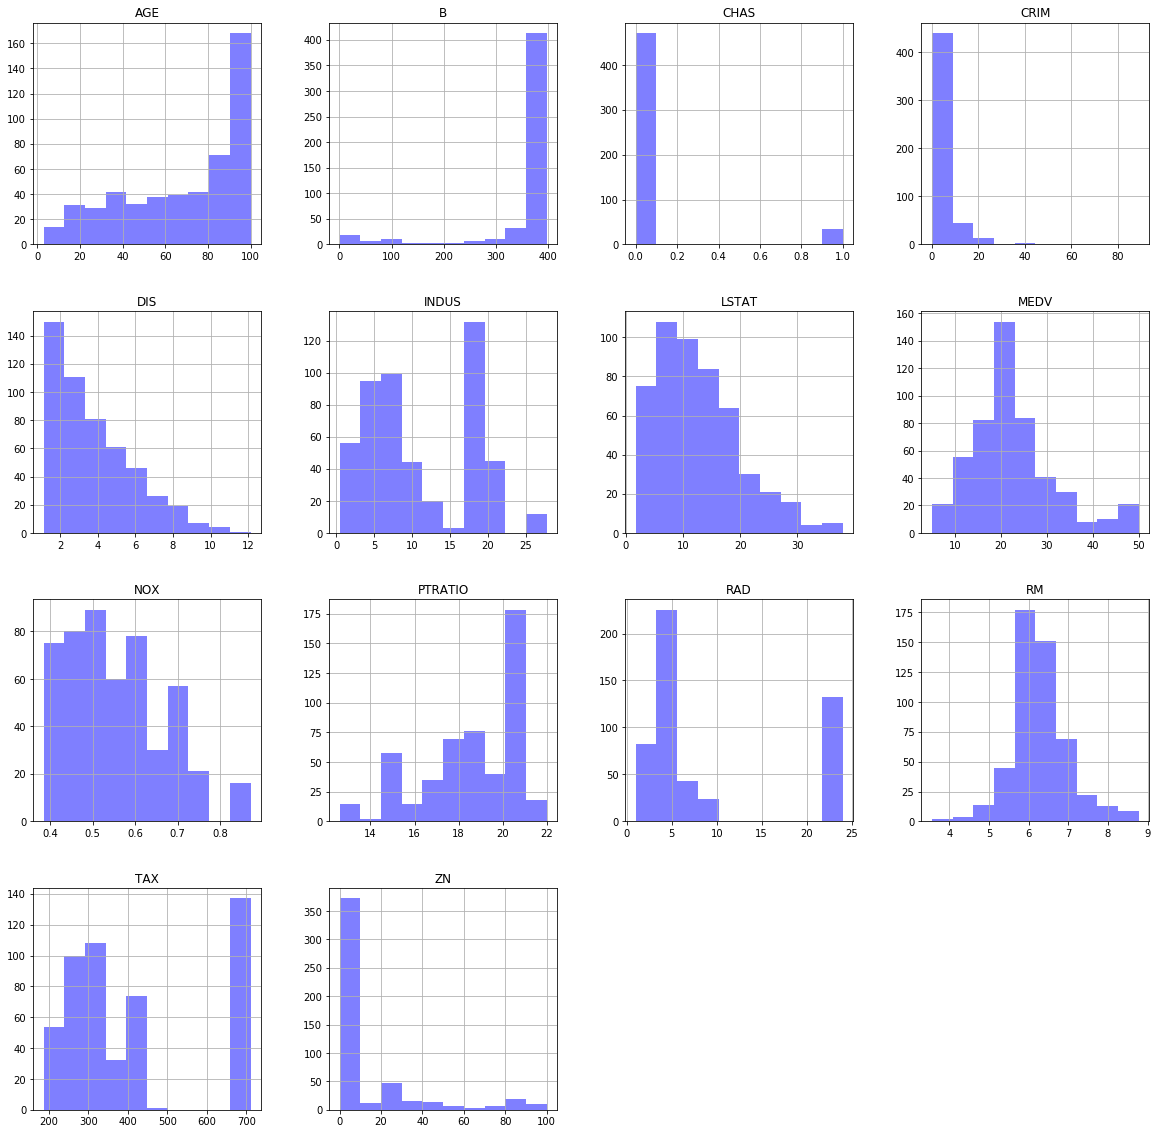

In [3]:
data.hist(color='blue', alpha=0.5, bins=10, figsize = (20,20));

CHAS - bernoulle,
RM - normal,
DIS - geometric,
LSTAT - negative binominal,
MEDV - lognormal,

In [10]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [30]:
# придется убрать отсутсвующие значения, заменю их стредними значениями, возможно где то нужно применить медиану.
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [31]:
def mean_fill_null(col):
    mean_count = df[col].mean()
    df[col] = df[col].fillna(mean_count)

In [32]:
mean_fill_null('Positive affect')
mean_fill_null('Negative affect')
mean_fill_null('Social support')
mean_fill_null('Freedom')
mean_fill_null('Corruption')
mean_fill_null('Generosity')
mean_fill_null('Log of GDP\nper capita')
mean_fill_null('Healthy life\nexpectancy')

Подсчитать матрицу ковыряций с помомщью метода numpy.cov()

In [34]:
x = df.iloc[:,3:11]
x.head()

,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [35]:
np.cov(x)

array([[ 303.92857143,  121.07142857,   33.75      , ...,  -18.96428571,
        -116.07142857, -139.21428571],
       [ 121.07142857,   94.5       ,   64.39285714, ...,  -29.17857143,
           9.5       ,   59.35714286],
       [  33.75      ,   64.39285714,   71.83928571, ...,  -34.44642857,
          21.03571429,   32.67857143],
       ...,
       [ -18.96428571,  -29.17857143,  -34.44642857, ...,   80.69642857,
          -4.96428571,  109.96428571],
       [-116.07142857,    9.5       ,   21.03571429, ...,   -4.96428571,
         255.92857143,  440.21428571],
       [-139.21428571,   59.35714286,   32.67857143, ...,  109.96428571,
         440.21428571, 1190.78571429]])

In [36]:
print(np.shape(np.cov(x)))

(156, 156)


In [37]:
np.cov(x.T)

array([[2002.        ,  780.17419355,  773.30967742, 1364.90322581,
         384.37419355,  710.46451613,  567.19354839,  618.61612903],
       [ 780.17419355, 2002.        , 1245.01935484,  861.34193548,
         293.27096774,  677.12903226, 1017.18064516,  902.33870968],
       [ 773.30967742, 1245.01935484, 2002.        ,  898.70322581,
         218.83225806,  885.7483871 , 1460.23225806, 1405.43548387],
       [1364.90322581,  861.34193548,  898.70322581, 2002.        ,
         698.26774194,  980.96129032,  774.98064516,  784.18709677],
       [ 384.37419355,  293.27096774,  218.83225806,  698.26774194,
        1742.81935484,  484.94193548,  342.27741935,  212.38709677],
       [ 710.46451613,  677.12903226,  885.7483871 ,  980.96129032,
         484.94193548, 2002.        ,  918.56129032,  798.61290323],
       [ 567.19354839, 1017.18064516, 1460.23225806,  774.98064516,
         342.27741935,  918.56129032, 1887.98709677, 1530.71612903],
       [ 618.61612903,  902.33870968, 140

In [38]:
standartized = (x - x.mean()) / x.std()

In [39]:
np.cov(standartized.T)

array([[1.        , 0.3896974 , 0.38626857, 0.68176984, 0.20577661,
        0.35487738, 0.29174252, 0.32457752],
       [0.3896974 , 1.        , 0.62188779, 0.43024073, 0.15700405,
        0.33822629, 0.52319856, 0.473442  ],
       [0.38626857, 0.62188779, 1.        , 0.44890271, 0.11715292,
        0.44243176, 0.75108725, 0.73740845],
       [0.68176984, 0.43024073, 0.44890271, 1.        , 0.37382105,
        0.48999065, 0.39862021, 0.41144983],
       [0.20577661, 0.15700405, 0.11715292, 0.37382105, 1.        ,
        0.25961604, 0.18869159, 0.11943488],
       [0.35487738, 0.33822629, 0.44243176, 0.48999065, 0.25961604,
        1.        , 0.47247256, 0.41901881],
       [0.29174252, 0.52319856, 0.75108725, 0.39862021, 0.18869159,
        0.47247256, 1.        , 0.82703594],
       [0.32457752, 0.473442  , 0.73740845, 0.41144983, 0.11943488,
        0.41901881, 0.82703594, 1.        ]])

In [40]:
x.corr()

,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Positive affect,1.000000,0.389697,0.386269,0.681770,0.205777,0.354877,0.291743,0.324578
Negative affect,0.389697,1.000000,0.621888,0.430241,0.157004,0.338226,0.523199,0.473442
Social support,0.386269,0.621888,1.000000,0.448903,0.117153,0.442432,0.751087,0.737408
Freedom,0.681770,0.430241,0.448903,1.000000,0.373821,0.489991,0.398620,0.411450
Corruption,0.205777,0.157004,0.117153,0.373821,1.000000,0.259616,0.188692,0.119435
Generosity,0.354877,0.338226,0.442432,0.489991,0.259616,1.000000,0.472473,0.419019
Log of GDP\nper capita,0.291743,0.523199,0.751087,0.398620,0.188692,0.472473,1.000000,0.827036
Healthy life\nexpectancy,0.324578,0.473442,0.737408,0.411450,0.119435,0.419019,0.827036,1.000000


Можно заметить, что матрица ковыряций ровна матрице корреляций, если данные нормированы.

## Визуализируем зависимости в таблице

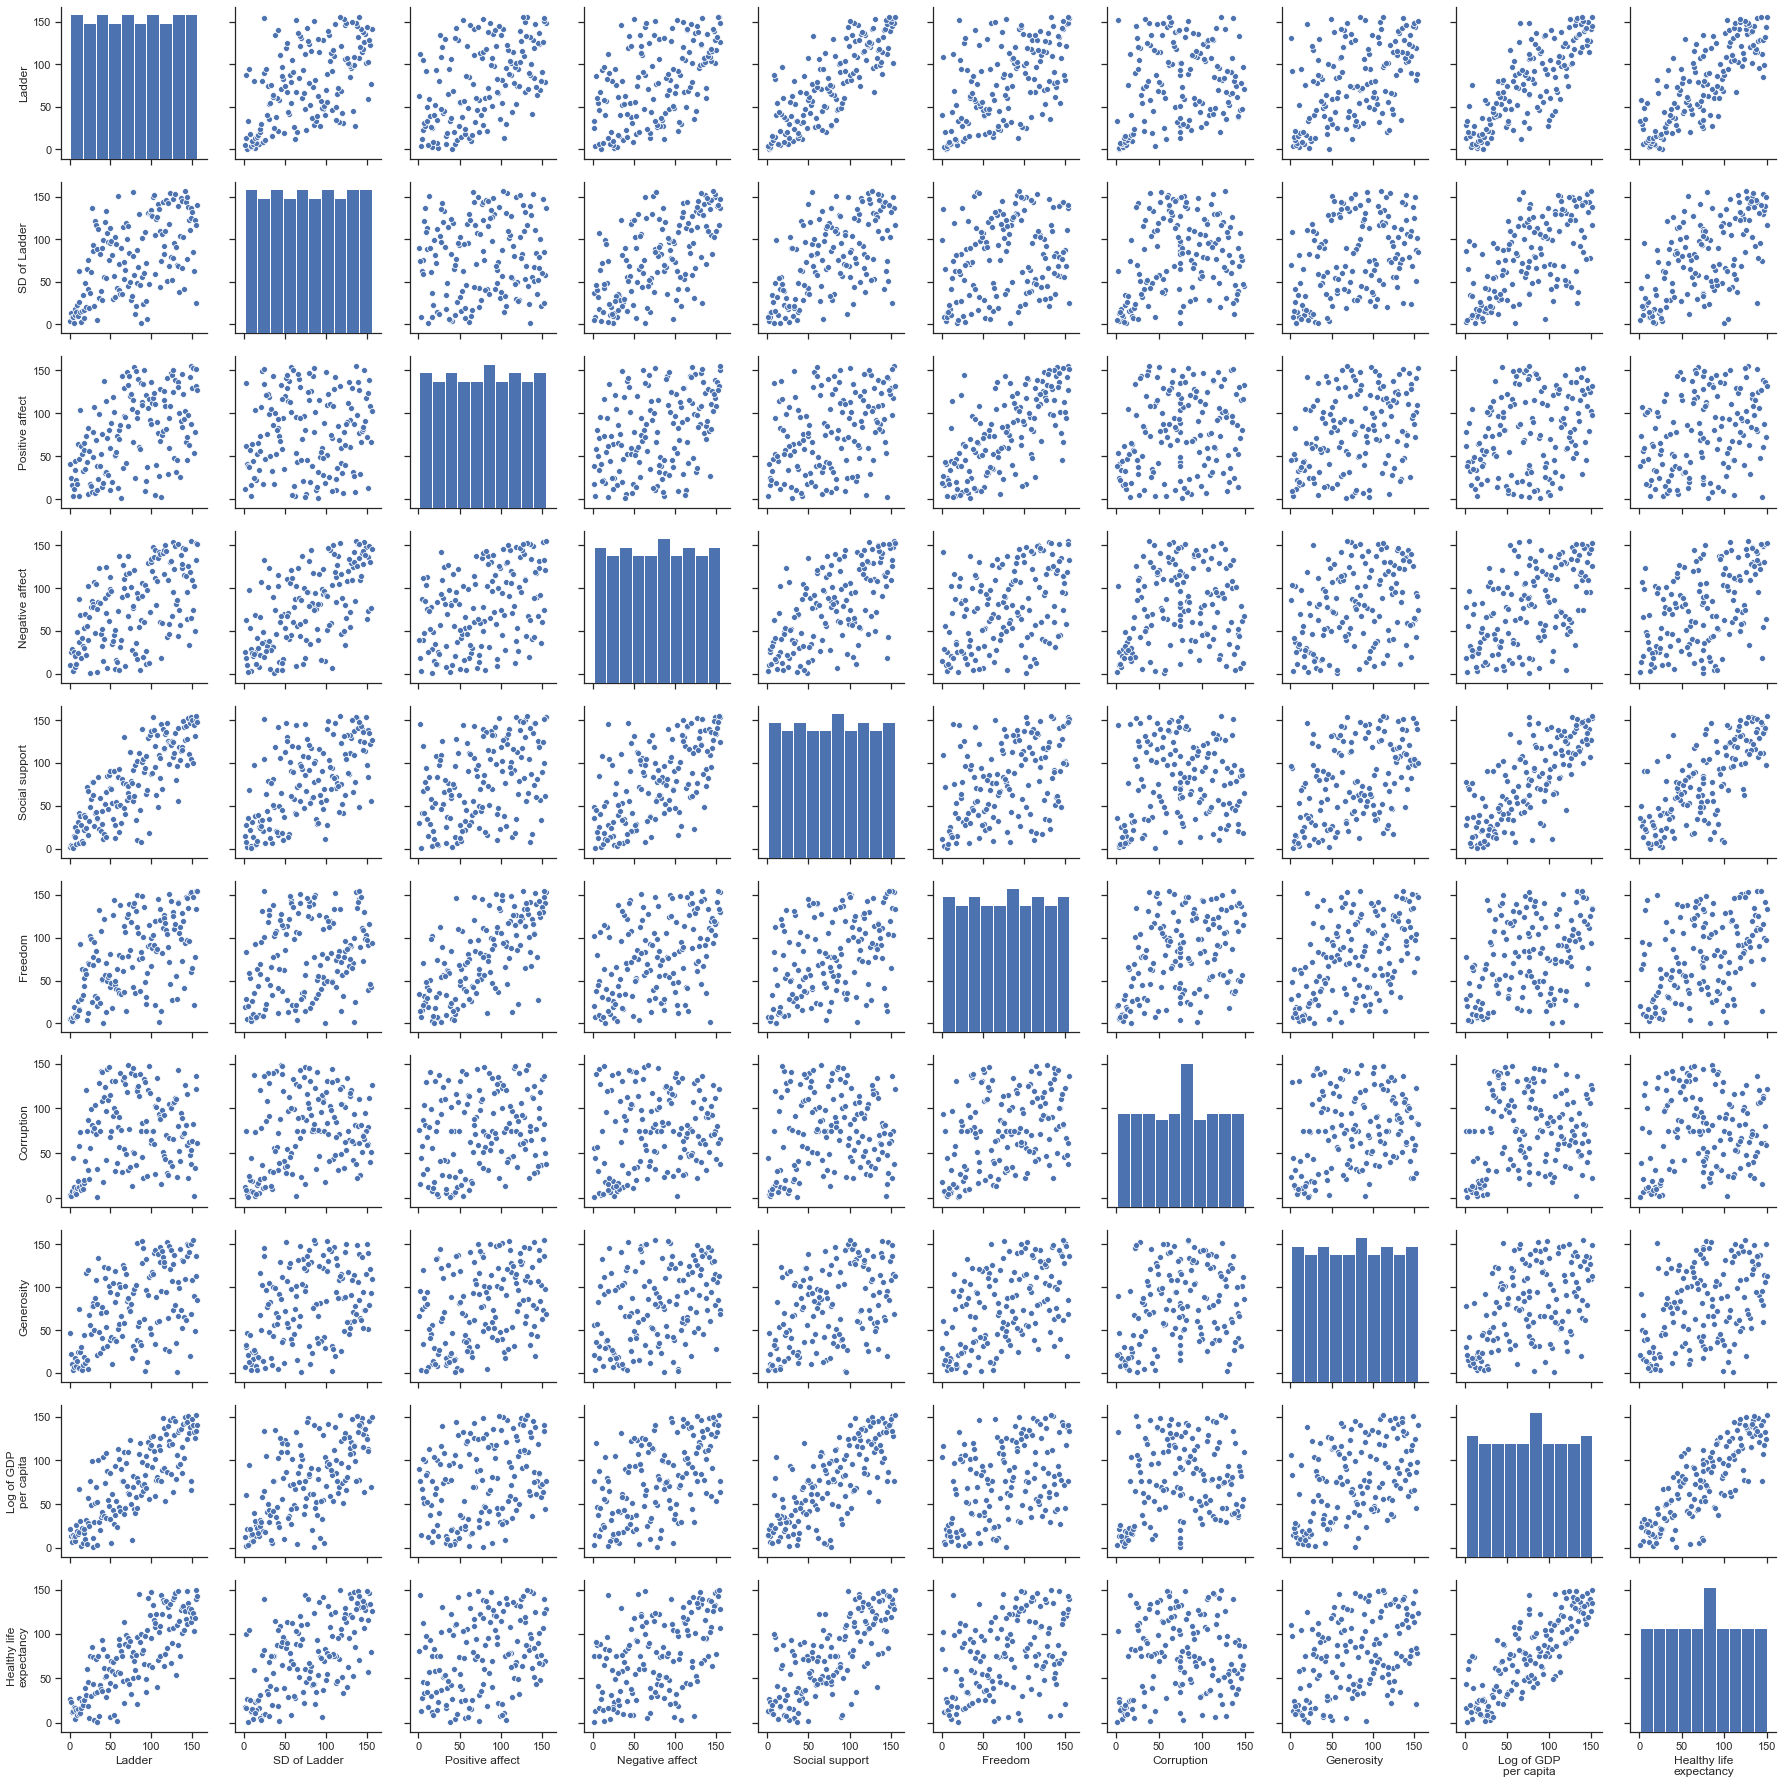

In [41]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df);

In [46]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [47]:
data.info()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB
Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy l

In [48]:
data.columns = ['country', 'ladder', 'sd_of_ladder', 'positive_affect',
       'negative_affect', 'social_support', 'freedom', 'corruption',
       'generosity', 'log_of_gdp_nper_capita', 'healthy_life_nexpectancy']

In [49]:
data.dropna(subset = ['positive_affect','negative_affect', 'social_support', 'freedom', 'corruption',
       'generosity', 'log_of_gdp_nper_capita', 'healthy_life_nexpectancy'], inplace = True)
print(data.isnull().sum())

country                     0
ladder                      0
sd_of_ladder                0
positive_affect             0
negative_affect             0
social_support              0
freedom                     0
corruption                  0
generosity                  0
log_of_gdp_nper_capita      0
healthy_life_nexpectancy    0
dtype: int64


Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [50]:
print(data['country'].unique())
data['country'].count()

['Finland' 'Denmark' 'Norway' 'Iceland' 'Netherlands' 'Switzerland'
 'Sweden' 'New Zealand' 'Canada' 'Austria' 'Australia' 'Costa Rica'
 'Israel' 'Luxembourg' 'United Kingdom' 'Ireland' 'Germany' 'Belgium'
 'United States' 'Czech Republic' 'Malta' 'Mexico' 'France' 'Chile'
 'Guatemala' 'Spain' 'Panama' 'Brazil' 'Uruguay' 'Singapore' 'El Salvador'
 'Italy' 'Slovakia' 'Trinidad and Tobago' 'Poland' 'Uzbekistan'
 'Lithuania' 'Colombia' 'Slovenia' 'Nicaragua' 'Argentina' 'Romania'
 'Cyprus' 'Ecuador' 'Thailand' 'Latvia' 'South Korea' 'Estonia' 'Jamaica'
 'Mauritius' 'Japan' 'Honduras' 'Kazakhstan' 'Bolivia' 'Hungary'
 'Paraguay' 'Peru' 'Portugal' 'Pakistan' 'Russia' 'Philippines' 'Serbia'
 'Moldova' 'Libya' 'Montenegro' 'Tajikistan' 'Croatia'
 'Dominican Republic' 'Bosnia and Herzegovina ' 'Turkey' 'Malaysia'
 'Belarus' 'Greece' 'Mongolia' 'Macedonia' 'Nigeria' 'Kyrgyzstan'
 'Algeria' 'Morocco' 'Azerbaijan' 'Lebanon' 'Indonesia' 'Vietnam' 'Bhutan'
 'Cameroon' 'Bulgaria' 'Ghana' 'Ivory Coas

140

#### "это проблема классификации?" - я так не думаю. Они вполне себе уникальны в разрезе данных которые представляют и тут нет мусора, вроде регинов или названий островов.  ну или смотря какое исследование мы хотим провести, может стоит их классифицировать по разным принципам, экономика, преступность а может вообще континент

Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

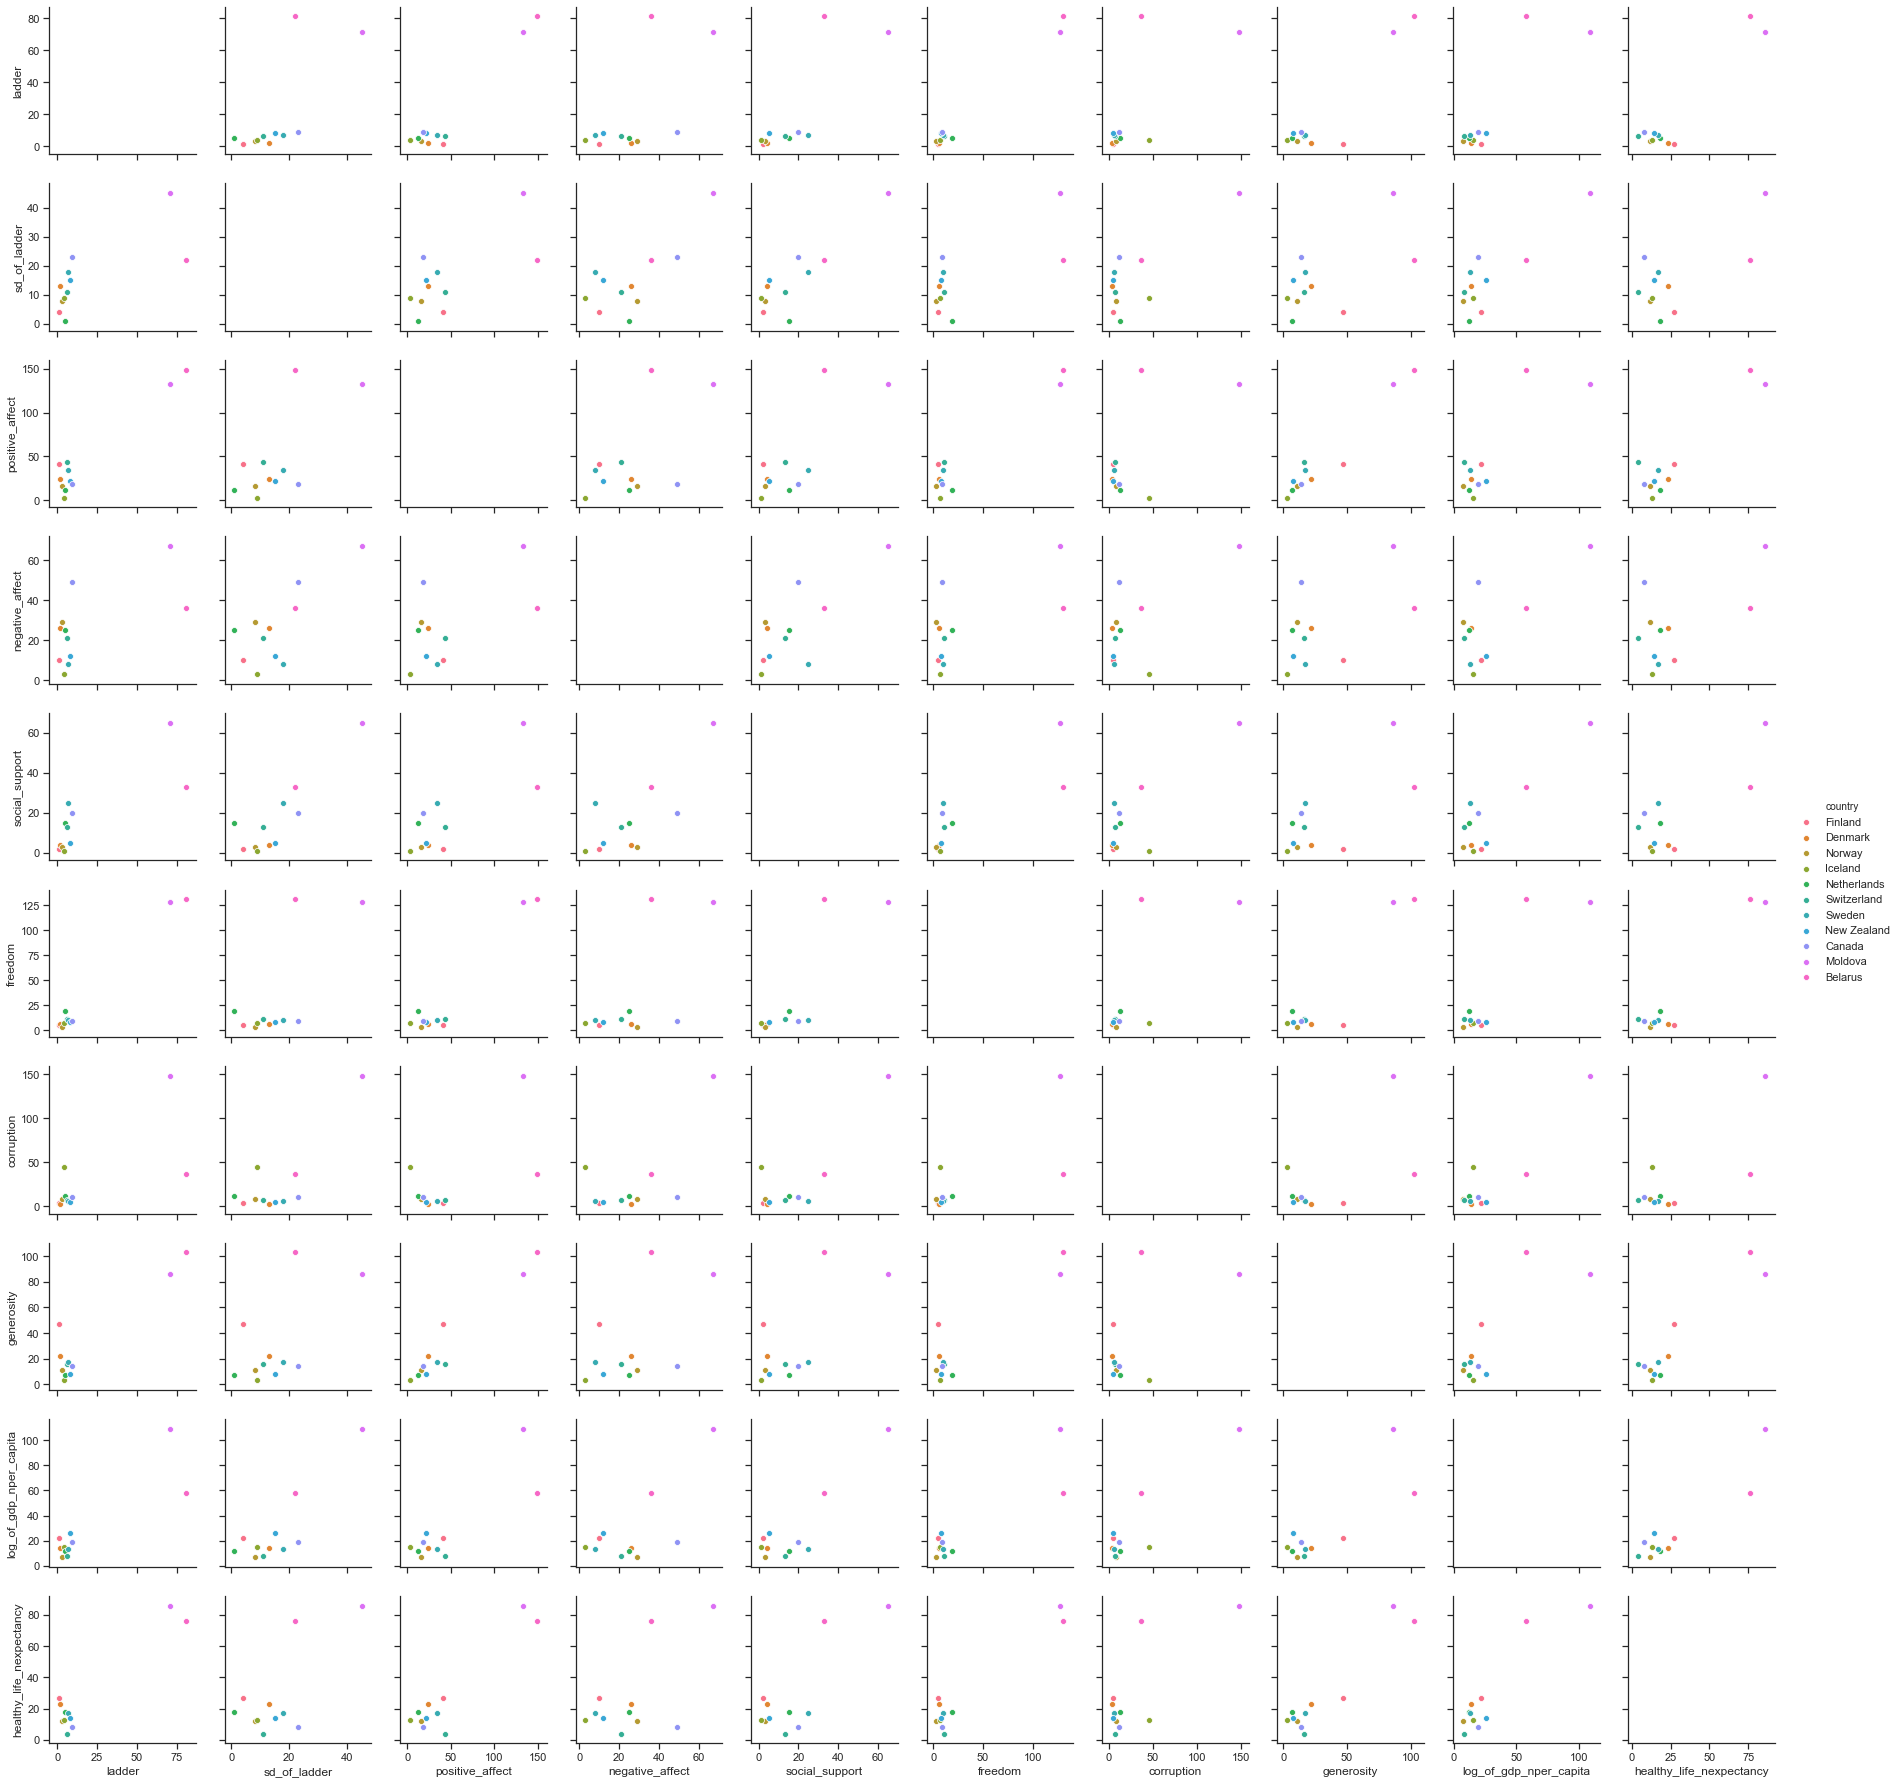

In [58]:
# Если код ниже не работает, измените код, используя материал лекций. Пишите на почту, если испытываете проблемы: yustiks@gmail.com

north_contry = ['Finland','Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland',
 'Sweden', 'New Zealand', 'Canada', 'Belarus', 'Moldova']
df_north_contry = data.query('country in @north_contry')

sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=df_north_contry, hue='country')
plt.show();

Сдедал график с европейскими и двумя странами постсоветсвокого союза (Беларусь, Молдова) и эти страны хорошо видно на графиках так как они стоят в всегда в другом угрлу двухмерного пространства. Это две точки розового оттенка.

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

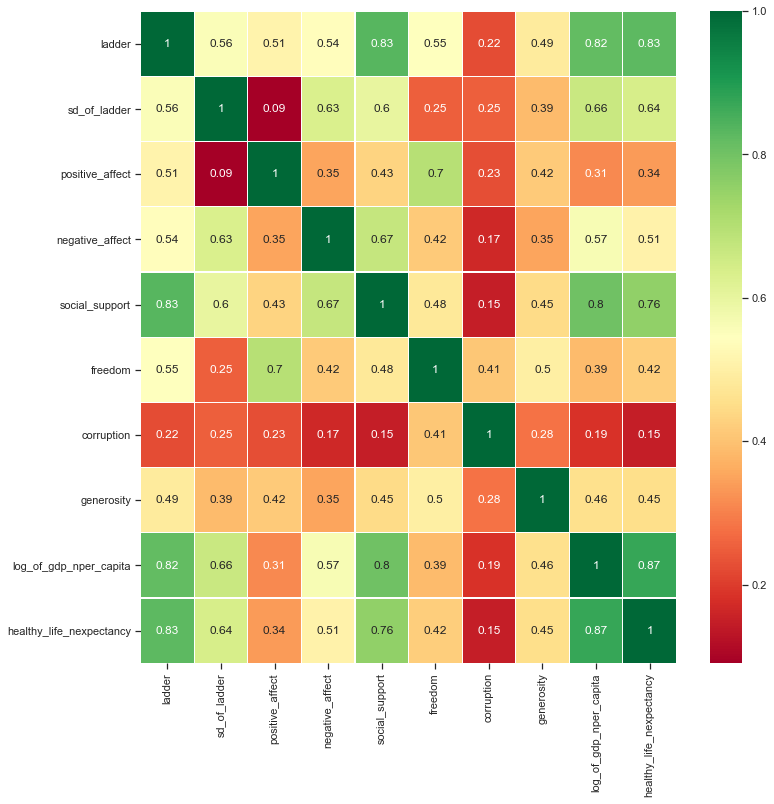

In [59]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Сказать много, что можно. Позвольте остановится только на одном классе? 
Ladder - Удовлетворение жизнью очень хорошо коррелируется с здоровьем и социальной поддержкой и самый большой показатель по свободе зато коррупции у счаствливых не место)

## Корреляционная матрица

In [60]:
print('корреляционная матрица, посчитаная для исходной таблицы:')
np.corrcoef(x.T)

корреляционная матрица, посчитаная для исходной таблицы:


array([[1.        , 0.3896974 , 0.38626857, 0.68176984, 0.20577661,
        0.35487738, 0.29174252, 0.32457752],
       [0.3896974 , 1.        , 0.62188779, 0.43024073, 0.15700405,
        0.33822629, 0.52319856, 0.473442  ],
       [0.38626857, 0.62188779, 1.        , 0.44890271, 0.11715292,
        0.44243176, 0.75108725, 0.73740845],
       [0.68176984, 0.43024073, 0.44890271, 1.        , 0.37382105,
        0.48999065, 0.39862021, 0.41144983],
       [0.20577661, 0.15700405, 0.11715292, 0.37382105, 1.        ,
        0.25961604, 0.18869159, 0.11943488],
       [0.35487738, 0.33822629, 0.44243176, 0.48999065, 0.25961604,
        1.        , 0.47247256, 0.41901881],
       [0.29174252, 0.52319856, 0.75108725, 0.39862021, 0.18869159,
        0.47247256, 1.        , 0.82703594],
       [0.32457752, 0.473442  , 0.73740845, 0.41144983, 0.11943488,
        0.41901881, 0.82703594, 1.        ]])

In [61]:
print('корреляционная матрица, посчитаная для нормализованной таблицы:')
np.corrcoef(standartized.T)

корреляционная матрица, посчитаная для нормализованной таблицы:


array([[1.        , 0.3896974 , 0.38626857, 0.68176984, 0.20577661,
        0.35487738, 0.29174252, 0.32457752],
       [0.3896974 , 1.        , 0.62188779, 0.43024073, 0.15700405,
        0.33822629, 0.52319856, 0.473442  ],
       [0.38626857, 0.62188779, 1.        , 0.44890271, 0.11715292,
        0.44243176, 0.75108725, 0.73740845],
       [0.68176984, 0.43024073, 0.44890271, 1.        , 0.37382105,
        0.48999065, 0.39862021, 0.41144983],
       [0.20577661, 0.15700405, 0.11715292, 0.37382105, 1.        ,
        0.25961604, 0.18869159, 0.11943488],
       [0.35487738, 0.33822629, 0.44243176, 0.48999065, 0.25961604,
        1.        , 0.47247256, 0.41901881],
       [0.29174252, 0.52319856, 0.75108725, 0.39862021, 0.18869159,
        0.47247256, 1.        , 0.82703594],
       [0.32457752, 0.473442  , 0.73740845, 0.41144983, 0.11943488,
        0.41901881, 0.82703594, 1.        ]])

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

In [ ]:
ladder = data['ladder']
generosity = data['generosity']
sns.regplot(x= ladder, y=generosity,data=df, fit_reg=True)
plt.xlabel('Степень удовлетворенности в стране')
plt.ylabel('Количество доброты')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

1. Мне кажется прямую нельзя назвать собственным вектором так как это совокупности корреляционного растояния между двумя выборками. 
2. Данные максимально разбросаны между собой а так же можно заметить слабую корреляцию 

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

Text(0.5, 1.0, 'Подбрасывание кубика 10 раз')

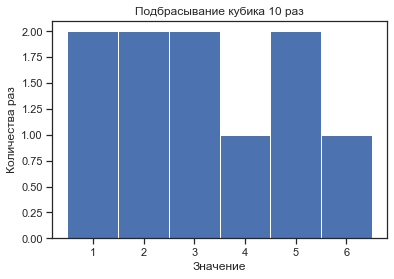

In [65]:
# Количество испытаний
trials = 10

# Массив значений
values = np.random.randint(1, 7, size=trials)
plt.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')

plt.xlabel('Значение')
plt.ylabel('Количества раз')
plt.title('Подбрасывание кубика ' + str(trials) + ' раз')

Если сто раз подбросить кубик то распределение будет равномерным. при ста раз этот график более виден если эксперимент сделать 10 раз то график будет будет меньше похож на равномерное распределение.

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

1 experiment with cub flips:  [5 6 1 4 1 6 6 6 4 2]


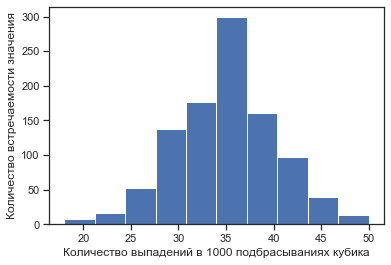

In [63]:
n_experiments = 1000
n_cub_trials = 10

rng = np.random.RandomState(123456)
outcomes = np.empty(n_experiments, dtype=np.float)

for i in range(n_experiments):
    cub_flips = rng.randint(1, 7, size=n_cub_trials)
    head_counts = np.sum(cub_flips)
    outcomes[i] = head_counts

print('1 experiment with cub flips: ', cub_flips)
plt.hist(outcomes, edgecolor='white')
plt.xlabel('Количество выпадений в 1000 подбрасываниях кубика')
plt.ylabel('Количество встречаемости значения')
plt.show()

график изменился в нормальное распределение - это закон центральной предельной теоремы. 

Ц.П.Т. так как тут все занчения были развнозначны то центральная предельная теорема подтверждается. при n количестве экспериментов график примимает нормальное распрееделение.